In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssms
from ssms.basic_simulators.simulator import simulator

In [2]:
model_config_ssm = {
            'name': 'angle',
            'list_params': ['a', 'z', 't', 'theta'],
            'bounds': [[0.3, 0.1, 0.0, 0.0], [2.5, 0.9, 2.0, 1.1]],
            'param_limits': {
                'a': [0.6, 2.0],
                'z': [0.2, 0.5],
                't': [0.1, 0.5],
                'theta': [0.0, 0.2],
            },
            'default_params': [1.0, 0.5, 0.001, 0.1],
            'nchoices': 2}

In [3]:
model_config_rl = {
        "list_params": ["scaler", "rl_alpha"],
        "bounds": {
            "scaler": (2.0, 5.0),
            "rl_alpha": (0, 1.0),
        },
        "param_limits": {
            "scaler": (2.0, 4.0),
            "rl_alpha": (0.3, 0.7),
        }
}

In [4]:
num_subj = 20
num_trials = 200

ch0_mean = 0.2
ch0_std = 0.1

ch1_mean = 0.8
ch1_std = 0.1

flag_param_limits = True

In [5]:
meta_data = {}
meta_data['num_subj'] = num_subj
meta_data['num_trials'] = num_trials
meta_data['ch0_mean'] = ch0_mean
meta_data['ch0_std'] = ch0_std
meta_data['ch1_mean'] = ch1_mean
meta_data['ch1_std'] = ch1_std

print(meta_data)

{'num_subj': 20, 'num_trials': 200, 'ch0_mean': 0.2, 'ch0_std': 0.1, 'ch1_mean': 0.8, 'ch1_std': 0.1}


In [6]:
# generate group-level parameters
if flag_param_limits:
    scaler_mean = np.random.uniform(model_config_rl["param_limits"]["scaler"][0], model_config_rl["param_limits"]["scaler"][1])
    scaler_std_upper = (model_config_rl["param_limits"]["scaler"][1] - model_config_rl["param_limits"]["scaler"][0]) * 0.3
    scaler_std = np.random.uniform(0.02, scaler_std_upper)

    rl_alpha_mean = np.random.uniform(model_config_rl["param_limits"]["rl_alpha"][0], model_config_rl["param_limits"]["rl_alpha"][1])
    rl_alpha_std_upper = (model_config_rl["param_limits"]["rl_alpha"][1] - model_config_rl["param_limits"]["rl_alpha"][0]) * 0.3
    rl_alpha_std = np.random.uniform(0.02, rl_alpha_std_upper)

    a_mean = np.random.uniform(model_config_ssm["param_limits"]["a"][0], model_config_ssm["param_limits"]["a"][1])
    a_std_upper = (model_config_ssm["param_limits"]["a"][1] - model_config_ssm["param_limits"]["a"][0]) * 0.3
    a_std = np.random.uniform(0.02, a_std_upper)

    z_mean = np.random.uniform(model_config_ssm["param_limits"]["z"][0], model_config_ssm["param_limits"]["z"][1])
    z_std_upper = (model_config_ssm["param_limits"]["z"][1] - model_config_ssm["param_limits"]["z"][0]) * 0.3
    z_std = np.random.uniform(0.02, z_std_upper)

    t_mean = np.random.uniform(model_config_ssm["param_limits"]["t"][0], model_config_ssm["param_limits"]["t"][1])
    t_std_upper = (model_config_ssm["param_limits"]["t"][1] - model_config_ssm["param_limits"]["t"][0]) * 0.3
    t_std = np.random.uniform(0.02, t_std_upper)

    theta_mean = np.random.uniform(model_config_ssm["param_limits"]["theta"][0], model_config_ssm["param_limits"]["theta"][1])
    theta_std_upper = (model_config_ssm["param_limits"]["theta"][1] - model_config_ssm["param_limits"]["theta"][0]) * 0.3
    theta_std = np.random.uniform(0.02, theta_std_upper)
else:
    pass

In [7]:
print("rl_alpha_mean: ", rl_alpha_mean)
print("rl_alpha_std: ", rl_alpha_std)
print("scaler_mean: ", scaler_mean)
print("scaler_std: ", scaler_std)
print("a_mean: ", a_mean)
print("a_std: ", a_std)
print("z_mean: ", z_mean)
print("z_std: ", z_std)
print("t_mean: ", t_mean)
print("t_std: ", t_std)
print("theta_mean: ", theta_mean)
print("theta_std: ", theta_std)

rl_alpha_mean:  0.38058283496489786
rl_alpha_std:  0.036227201804246864
scaler_mean:  2.8160897630999067
scaler_std:  0.3005791768580738
a_mean:  0.752250070296641
a_std:  0.3972433759308985
z_mean:  0.4445064857343899
z_std:  0.022365795406416904
t_mean:  0.21617680101801462
t_std:  0.08918176346458387
theta_mean:  0.08151743574515158
theta_std:  0.05980480773797282


In [8]:
def truncated_normal(mean, std_dev, lower_bound, upper_bound, size=1):

    samples = []
    while len(samples) < size:
        # Generate a sample from the untruncated normal distribution
        sample = np.random.normal(loc=mean, scale=std_dev)

        # Check if the sample is within the desired bounds
        if lower_bound <= sample <= upper_bound:
            samples.append(sample)
    return np.array(samples)

In [9]:
# get parameters for each subject
rl_alpha_subjs = truncated_normal(rl_alpha_mean, rl_alpha_std, 0.3, 0.7, num_subj)
scaler_subjs = truncated_normal(scaler_mean, scaler_std, 2, 4, num_subj)
a_subjs = truncated_normal(a_mean, a_std, 0.6, 2, num_subj)
z_subjs = truncated_normal(z_mean, z_std, 0.2, 0.5, num_subj)
t_subjs = truncated_normal(t_mean, t_std, 0.1, 0.5, num_subj)
theta_subjs = truncated_normal(theta_mean, theta_std, 0.0, 0.2, num_subj)

<BarContainer object of 10 artists>

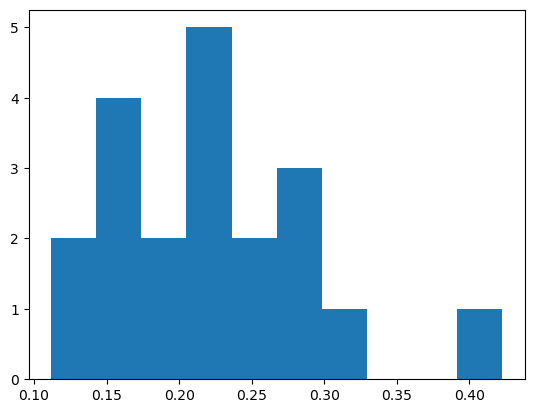

In [10]:
plt.hist(t_subjs)[-1]

In [11]:
group_params = {}
group_params["rl_alpha_mean"] = rl_alpha_mean
group_params["rl_alpha_std"] = rl_alpha_std
group_params["scaler_mean"] = scaler_mean
group_params["scaler_std"] = scaler_std
group_params["a_mean"] = a_mean
group_params["a_std"] = a_std
group_params["z_mean"] = z_mean
group_params["z_std"] = z_std
group_params["t_mean"] = t_mean
group_params["t_std"] = t_std
group_params["theta_mean"] = theta_mean
group_params["theta_std"] = theta_std

In [12]:
subj_params = {}
subj_params["rl_alpha"] = rl_alpha_subjs
subj_params["scaler"] = scaler_subjs
subj_params["a"] = a_subjs
subj_params["z"] = z_subjs
subj_params["t"] = t_subjs
subj_params["theta"] = theta_subjs

In [13]:
# generate  multi-armed bandit data for each subject
data = []
for subj in np.arange(num_subj):
    alpha = subj_params["rl_alpha"][subj]
    scaler = subj_params["scaler"][subj]
    a = subj_params["a"][subj]
    z = subj_params["z"][subj]
    t = subj_params["t"][subj]
    theta = subj_params["theta"][subj]
    
    # initialize Q values 
    #q_val = np.random.normal(0.5, 0.02, 2)
    q_val = np.array([0.5, 0.5])

    # initialize data
    subj_data = {
        "participant_id": subj,
        "trial": np.arange(num_trials),
        "response": np.zeros(num_trials),
        "rt": np.zeros(num_trials),
        "feedback": np.zeros(num_trials),
        "correct": np.zeros(num_trials),
        "q_val_0": np.zeros(num_trials),
        "q_val_1": np.zeros(num_trials),
    }

    # generate data
    for trial in np.arange(num_trials):
        
        computed_v = (q_val[1] - q_val[0]) * scaler
        #print("computed_v: ", computed_v, scaler, q_val)

        sim_out = simulator(model = 'angle', 
                    theta = {'v': computed_v, 
                             'a': a,
                             'z': z,
                             't': t,
                             'theta': theta
                    },
                    n_samples = 1,
                    random_state = np.random.randint(10000))

        ssm_action = sim_out['choices'][0, 0]
        #print("> action ", action)
        if ssm_action == -1:
            action = 0
        elif ssm_action == 1:
            action = 1
        rt = sim_out['rts'][0, 0]
        #print("action2: ", action)

        if ch0_mean > ch1_mean:
            corr_action = 0
        else:
            corr_action = 1

        # compute reward
        if action == 1:
            reward = np.random.normal(ch1_mean, ch1_std)
        elif action == 0:
            reward = np.random.normal(ch0_mean, ch0_std)
        
        #print("> ", ssm_action, action, corr_action, reward, q_val, computed_v)

        # update Q values
        q_val[action] += alpha * (reward - q_val[action])

        # save data
        subj_data["response"][trial] = action
        subj_data["rt"][trial] = rt
        subj_data["feedback"][trial] = reward
        subj_data["correct"][trial] = int(action == corr_action)
        subj_data["q_val_0"][trial] = q_val[0]
        subj_data["q_val_1"][trial] = q_val[1]
    
    data.append(pd.DataFrame(subj_data))

# save data
data = pd.concat(data)

In [14]:
data

,participant_id,trial,response,rt,feedback,correct,q_val_0,q_val_1
0,0,0,1.0,1.203681,0.890406,1.0,0.500000,0.653201
1,0,1,1.0,1.206428,0.868511,1.0,0.500000,0.737692
2,0,2,0.0,0.348277,0.016405,0.0,0.310230,0.737692
3,0,3,1.0,0.449513,0.912181,1.0,0.310230,0.806164
4,0,4,0.0,0.610619,0.180972,0.0,0.259507,0.806164
...,...,...,...,...,...,...,...,...
195,19,195,1.0,0.403717,0.949937,1.0,0.111272,0.853885
196,19,196,1.0,0.705040,0.736659,1.0,0.111272,0.807844
197,19,197,1.0,1.575469,0.775331,1.0,0.111272,0.795074
198,19,198,1.0,0.720817,0.686560,1.0,0.111272,0.752455


In [ ]:
save_file = {"data": data, "meta_data": meta_data, "params_true_group": group_params, "params_true_subj": subj_params}
#np.save("./data/2AB_angle_data_2.npy", save_file)

In [16]:
# for every participant, print average accuracy
for subj in range(num_subj):
    print("subj: ", subj, " acc: ", data[data["participant_id"] == subj]["correct"].mean())

subj:  0  acc:  0.86
subj:  1  acc:  0.845
subj:  2  acc:  0.915
subj:  3  acc:  0.855
subj:  4  acc:  0.93
subj:  5  acc:  0.87
subj:  6  acc:  0.87
subj:  7  acc:  0.905
subj:  8  acc:  0.985
subj:  9  acc:  0.83
subj:  10  acc:  0.885
subj:  11  acc:  0.865
subj:  12  acc:  0.875
subj:  13  acc:  0.915
subj:  14  acc:  0.93
subj:  15  acc:  0.955
subj:  16  acc:  0.895
subj:  17  acc:  0.86
subj:  18  acc:  0.81
subj:  19  acc:  0.91


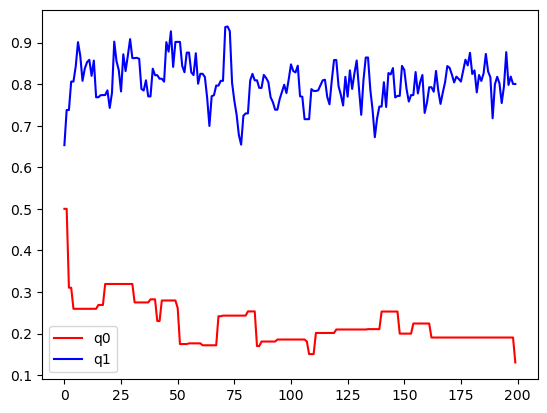

In [17]:
s1 = data[data['participant_id'] == 0]
q0 = s1['q_val_0']
q1 = s1['q_val_1']

plt.plot(q0, color='red', label='q0')
plt.plot(q1, color='blue', label='q1')
plt.legend()
plt.show()

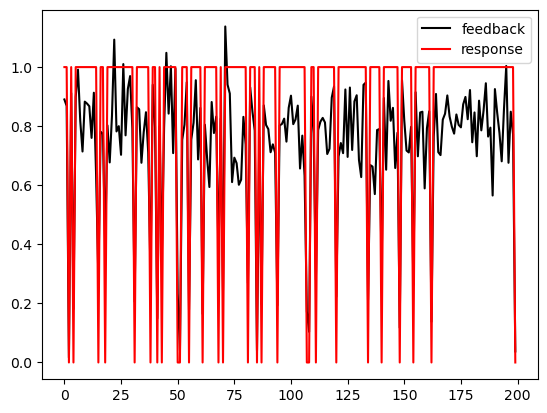

In [18]:
plt.plot(s1['feedback'], color='black', label='feedback')
plt.plot(s1['response'], color='red', label='response')
plt.legend()

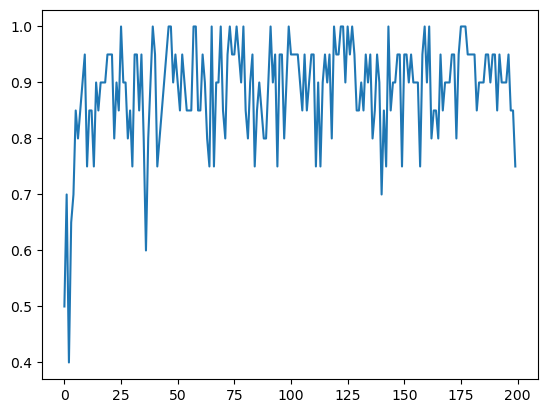

In [19]:
# plot proportion of correct responses
correct = data.groupby('trial')['correct'].mean().values
plt.plot(correct)
plt.show()

(array([ 62., 215., 391., 449., 422., 420., 337., 306., 265., 221., 185.,
        148., 113.,  95.,  60.,  49.,  39.,  46.,  27.,  25.,  23.,  16.,
         13.,  12.,  13.,  12.,   7.,   2.,   7.,   4.,   3.,   4.,   1.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   0.,   1.,   0.,   1.]),
 array([0.16640753, 0.23484885, 0.30329017, 0.37173149, 0.44017281,
        0.50861413, 0.57705545, 0.64549677, 0.71393809, 0.78237941,
        0.85082073, 0.91926205, 0.98770337, 1.05614469, 1.12458601,
        1.19302734, 1.26146866, 1.32990998, 1.3983513 , 1.46679262,
        1.53523394, 1.60367526, 1.67211658, 1.7405579 , 1.80899922,
        1.87744054, 1.94588186, 2.01432318, 2.0827645 , 2.15120582,
        2.21964715, 2.28808847, 2.35652979, 2.42497111, 2.49341243,
        2.56185375, 2.63029507, 2.69873639, 2.76717771, 2.83561903,
        2.90406035, 2.97250167, 3.04094299, 3.10938431, 3.17782563,
        3.24626696, 3.31470828, 3.3831496 , 3.

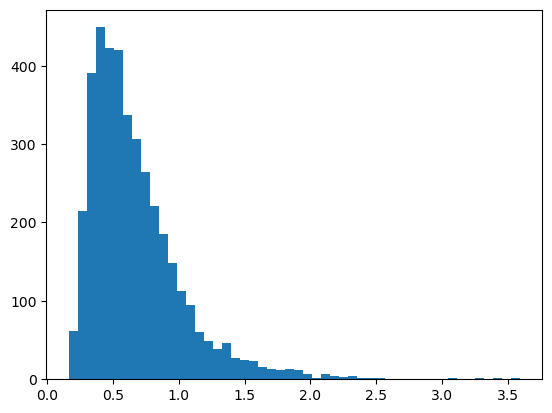

In [20]:
rt_all = data['rt'].values
plt.hist(rt_all, bins=50)